# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [37,231,413]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,15168,10556,12477,1920,6506,714
1,2344,10678,3828,1439,1566,490
2,4983,4859,6633,17866,912,2435


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** Let's begin this answer by making a few assumptions more explicit from Udacity's dataset. The customers in this case are likely not individuals b/c the spending is too high as shown in the descriptive stats above for an individual household. Thus, assumption #1 is that the customers are other businesses. Secondly, I'm going to assume the units are in dollars. I'm also going to assume the time period represented is not one week (seems too high for a week) but more likely a year or 6 month period, depending upon the scope of the 440 sample. Thus, my full answer is below for indicies 37, 231, 413 given those assumptions is as follows: <br> <br> <li> <u> Indicy 31:</u> Indicy 31 spends slightly more than the mean on Fresh, Double the mean on Milk, 4x the mean on Grocery, slightly less than the mean on Frozen, 2x the mean on Paper and under the mean on Deli. My guess is that indicy 37 is a small grocery store that doesn't have a large frozen food aisle or deli. The reason for this guess is primarily due to all of their indicators being significantly higher than mean for all variables except frozen and deli. To me this indicates a middle man 'mom and pop' type grocery store which sells lots of Milk, Groceries and Paper goods. <br> <br> <li> <u> Indicy 231:</u> Indicy 231 spends significatly less on Fresh than the mean -4x, 2x the mean on Milk about the average on Grocery, half the average on Frozen, half the average on paper and -3x on Deli. My guess is that Indicy 231 is a coffee shop with limited food options. I'm guessing this b/c the only indicator where it spends more signifincantly than the average is Milk--a neceassary ingredient for all of the delicious coffee drinks we all love. <br> <br> <li> <u> Indicy 413:</u> Indicy 413 spends less than half the average on Fresh, a little less than the average on Milk, 2x the average on Grocery 5x the average on Frozen, less than the average on Paper and more than the average (1.5X) on deli. I'm tempted to guess that Indicy 413 is a fast food restuarant but I'm confused why the Paper variable doesn't trend higher than the average. Thus, I believe that Indicy 413 is a sit down restaurant consistent with Fast Food dining options (burgers, fries, onion rings) but there isn't a huge carry out option (explaining the low Paper consumption). A sustainable fast food restaurant perhaps!?!?

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
labels_final = data['Detergents_Paper']
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    labels_final, 
                                                    test_size = 0.25, 
                                                    random_state = 25)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=25)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print score

0.744682803266


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** Given the discussion above about Indicy 431 and my confusion as to whether or not the Detergents_Paper variable had anything to do with the Frozen variable I chose the Detergents_Paper Variable to explore more. The prediction score or Coefficient of Determination is .75. As discussed (given) above by Udacity this score can vary from 0 to 1, 1 being a perfectly predictable situation and 0 being the opposite. Thus, a .75 coefficient of determination is quite high. This means that the decision tree regressor model can predict the Detergents_Paper variable well using the other 5 variables. Thus, the Detergents_Paper variables importance in terms of the overall model would be viewed as less necessary for identifying customers' spending habits than perhaps some of the other variables in the dataset.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab713d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d4a1f10>]], dtype=object)

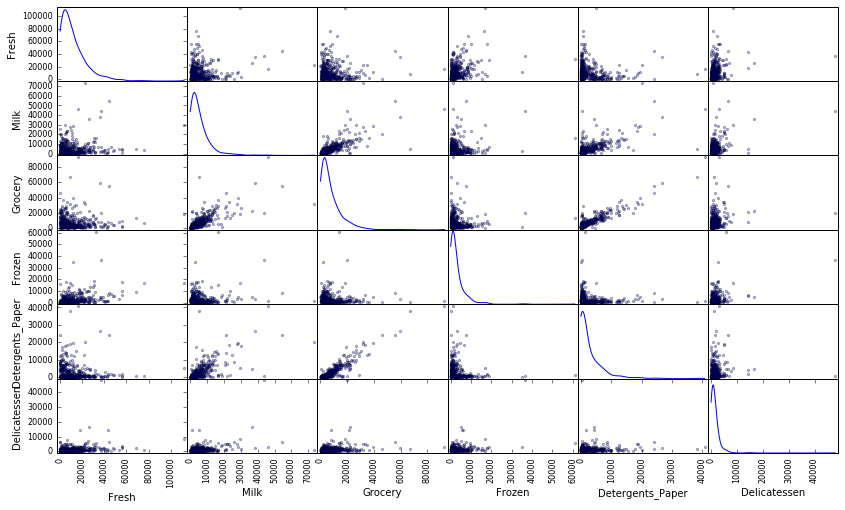

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#plt.hist(data['Delicatessen'], bins=444);

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


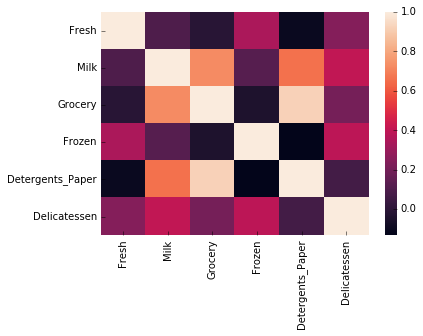

In [6]:
# Calcuate the Correlation Coefficients in a 2 by 2 Matrix
print data.corr()

# Visualize those Coefficients using Heatmap
import seaborn as sns
sns.heatmap(data.corr())

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** For the purposes of this answer I will break each feature of the dataset out and talk about it seperately: <br> <br> <li> <u> Fresh:</u> The fresh variable is right skewed with a long tail to the right. There are likely 4 or 5 outliers > 6000K. But I'd probably do a more statistical test before I'd throw them out. This is likely due to some customers spending a significant amount more than the mean on Fresh. One customer spent close to 10K on Fresh which is well outside the mean. Fresh has the highest correlation coefficient with frozen and Deli at .34 and .24 and isn't really highly correlated with the other variables. I don't really know if I had any suspicions at all about which variables were or were not correlated with Detergent_Paper (the variable I attempted to predict). Honestly, whenever I do data analysis I look for correlation first b/w the variables and not try to use variables to predict on other variables (as a means to look for relationships between the two) so I'm not really sure of I can answer about my suspicions. W.r.t the the correlation coefficient b/w Detergents_Paper and Fresh it's -.1 which shows that there is no relationship b/w the two variables. <br> <br> <li> <u> Milk:</u> Milk, like Fresh is right skewed with a long tail. Unlike Milk though I'd assume that > 30K as opposed to 40K is likely a candidate for further inspection for outliers. Milk is correlated with Grocery and detergents_paper at .72 and .66 respectively. For Deli there is also a slight correlation at .44 respectively. Again, I had no pre-conceived notion about the relevance of with Detergent_Paper but it is noteworthy that there is a relatively strong relationship b/w the two variables Milk and Grocery. <br> <br> <li> <u> Grocery:</u> Grocery--like the others-- is right skewed and has an outlier inspection point of about 30K. It's beginning to make alot of the variables look very very similar. Grocery has a high correlation coefficient with Milk (which has already been discussed above under Milk and with Detergents_Paper). The relationship with detergents paper is very strong with a .92. I'm not entirely sure what the basket of goods is that encompasses "Grocery" but I imagine that the goods are either complements of one another or that they are just related in terms of the types of establishments that carry them (this is certainly the case based on the correlation coefficient). <br> <br> <li> <u> Frozen:</u> Frozen is also right skewed but with a smaller tail the some of the other variables. I'd set the outlier inspection point at 20K. It doesn't have a high correlation coefficient with any of the variables with the highest correlation coefficient being at .39 with Deli respectively. The data is not related to Detergents_Paper with a correlation coefficient of -.13. I had no preconceived notions as to whether or not this would be related. <br> <br> <li> <u> Frozen:</u> Detergents_Paper is right skewed with a shorter tail than the others. I'd set outlier inspection to 20K or maybe even 15K. As discussed above the correlation with Grocery is quite strong, which explains why the model to predict was powerful. In the 2 x 2 scatter plots the relationship b/w Grocery and Detergents_Paper almost looks linear in nature again further confirming the relationship b/w the two variables. <br> <br> <li> <u> Deli:</u> Finally, Deli. Delicatessen is right skewed with the shortest tail of all the variables. I'd set outlier analysis to anything greater than 10K. Like all the other variables, there are a huge number of observations that have points clustered near zero. Deli has the strongest relationship with Milk at .4 which is not particularly noteworthy. Deli has a .06 correlation coefficient with Detergents_Paper with essentially means there is no linear relationship at all. The correlation coefficient is by definition a measurement of linear relationship b/w two variables. <br> <br> <li> <b> Questions for my Udacity Grader:</b> How do you show money signs in Jupyter Notebooks? How do you suppress the echo in a Jupyter Notebook. I'm used to R Markdown where you simply write SET ECHO OFF at the beginning of a cell. Is there a similar function in Jupyter Notebooks?

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

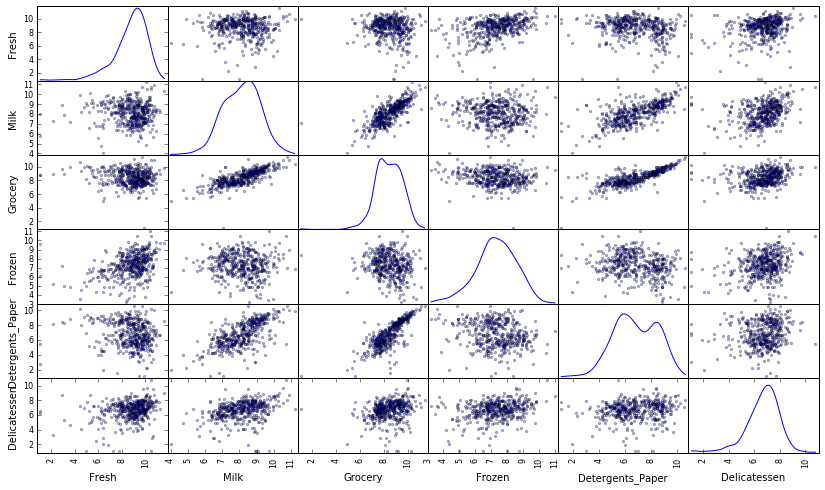

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.626943,9.264450,9.431642,7.560080,8.78048,6.570883
1,7.759614,9.275941,8.250098,7.271704,7.35628,6.194405
2,8.513787,8.488588,8.799812,9.790655,6.81564,7.797702


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66,75,142,154,289,338]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** I chose to remove six data points in total from the data set due to outlier detection. The points were 66,75,142,154,289,338. These were the points that were considered outliers in more than one category. I chose not to remove outliers that were only present in one category but chose to remove outliers that were present in more than one category. The reason for this is that a customer that is present for outliers in more than one cateogry likely is not representative of the class where as with outlier in only one category perhaps they should be considered. I'm generally very conservative about outlier detection, especially Tukey's method as the 1.5 * IQR seems extremely arbitrary. As we have seen, outliers can cause headaches when trying to use K-Means. As the algorithm of K-Means tries to identify the centroid of a point cloud by minimizing the loss function (based on some measure of distance -- Euclidean or otherwise), an outlier can cause the centroid to be very off or (in the worst case scenario for K-Means) create a another centroid altogether based only on the outlier (this would be a very extreme case). For this reason, I found it prudent to remove those 6 observations from this dataset due to outlier detection.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

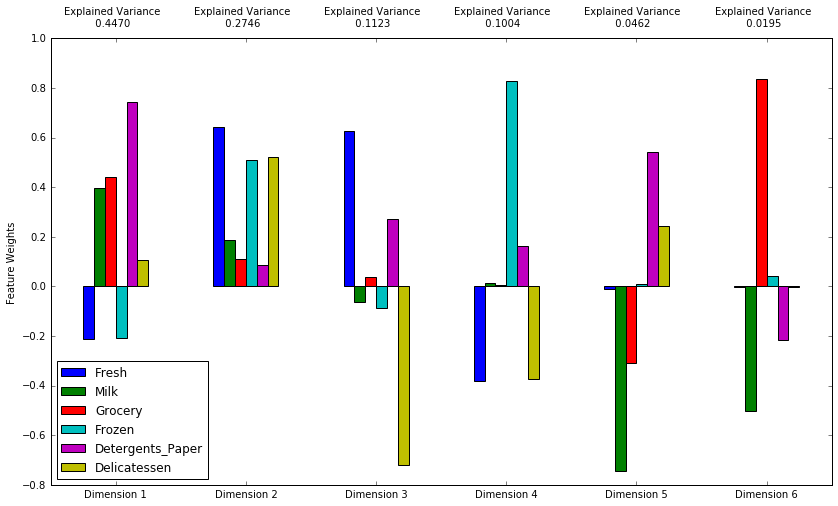

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** The amount of variance explained in total by PC 1 is .4422. The amount of variance explained in total by PC 2 is .2823. Therefore, the amount of variance explained in total by PC 1 & 2 is 1 or .7245 of the variance. The amount of variance explained in total by the first 4 PCs is .9352. W.R.T. each Dimension above, for PC 1 above it seems like a good deal of the overall variance is explained by the Detergents_Paper feature in combination with Milk and Grocery. The largest negative feature weights are Fresh and Frozen. W.R.T. PC 2 the overall variance can be explained by Fresh, Frozen and Deli which all have the largest feature weights. For PC 3 Fresh has the largest postive feature weight while Deli has the strongest negative feature weight. PC 4 has the highest overall variance explained by Frozen as it has the highest feature weight while the others are negligible orhave feature weights that are negative. PC 5 has a strong negative weight in Milk while the strongest postive feature weight was Detergents_Paper. Finally, for PC 6 the strongest postive feature weight was Grocery while the strongest negative feature weight was Milk. <br> <br> It's hard to tell exactly what each PC represents as by definition of PCA the new PCs can be a mix of all the components. PCA only cares about othogonality in it's variance vectors to identify the overall independent components. That said for the last part of the question I'll try to explain what I think is happening in each of the first 4 components. For component one, it's the combo of Milk, Grocery and Detergents_Paper that is contributing to the overall variance. I would imagine that this might represent a particular type of store, what that store type is I do not know. For component two, it's a combo of high fresh frozen and deli. Again, I think that might represent a type of store. For component 3, the story is fresh with a high negative feature weight on Deli. Perhaps this customer just sells lots of fresh goods? And finally, for component 4, the story is all Frozen. Again this customer buys more Frozen than all other featuers. I think this represents a particular type of customer. Perhaps Fast Food?

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0579,1.1074,1.1137,0.2704,-0.1117,-0.1728
1,0.9046,-0.6927,-0.1934,0.6455,-0.6032,-0.8620
2,-0.0764,1.7798,-1.1735,1.7510,-0.0699,0.2130


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0267,1.1767
1,0.9196,-0.6663
2,-0.1099,1.7471


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

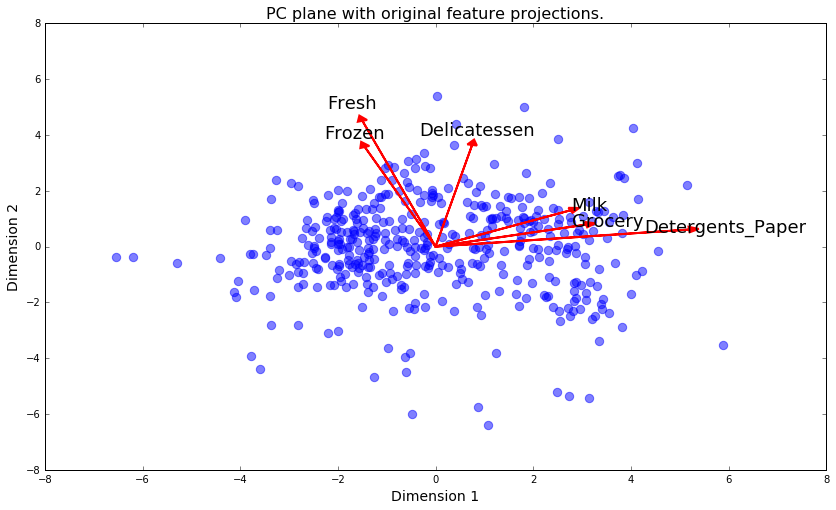

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** I'm baised for sure but I tend to favor Gaussian Mixture Model clustering more than K-Means and thus I will chooose it in this instance. K-Means is what's known as a "Hard Clustering" model. This means that it makes cut offs at certain points based on the it's desire to minimize the loss function through assigning centroid points (the Ks) based on a measure of some distance (manhattan or euclidean) to the various (hopefully Gaussian) point clouds. This has the advantage of setting hard partitions and easily being able to assign every single point to a particular partition based on it's distance from the centroid (the Ks). It will be clear what those partitions were and there will be no features that could be in either partition. Therefore it is simple to understand and relatively easy to explain (not to executives at my company with no math skills!). It isn't particularly robust to outliers however and it has other drawbacks though which Gaussian Mixture Model (GMM) Clustering can help to solve. GMM clustering uses probabilistic density distributions to assign points to a cluster with certain probabilities. This allows for some points farther away from the Centroid to be assigned sometimes to one centroid and sometimes to a different centroid (based on probabilities). This is much better when data is noisy and centroids hard to assign. It is also a much more robust clustering method b/c it's much more robust to outliers. The EM algorightm is a good example of GMM clustering but there are many types. For the purposes of this assignment I am choosing GMM clustering b/c 1) I like it better 2) it's more robust to outliers and we've already shown and intentionally left in a numerous points that we identified as being outliers in a previous step 3) we've seen that are data is still pretty noisy even though taking the log transform of all the data made it much cleaner. A drawback of the EM algorithm however is that it only seeks to maximizes the likelihood and that may not be what one wants.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
clusterer = GMM(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print score

0.41509095452


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** For 2 clusters the sihouette score was .414; for 3 clusters: .377; 4 clusters: .313; 5 clusters: .283 & 6 clusters: .279 The highest silhouette score was .414 which was for 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

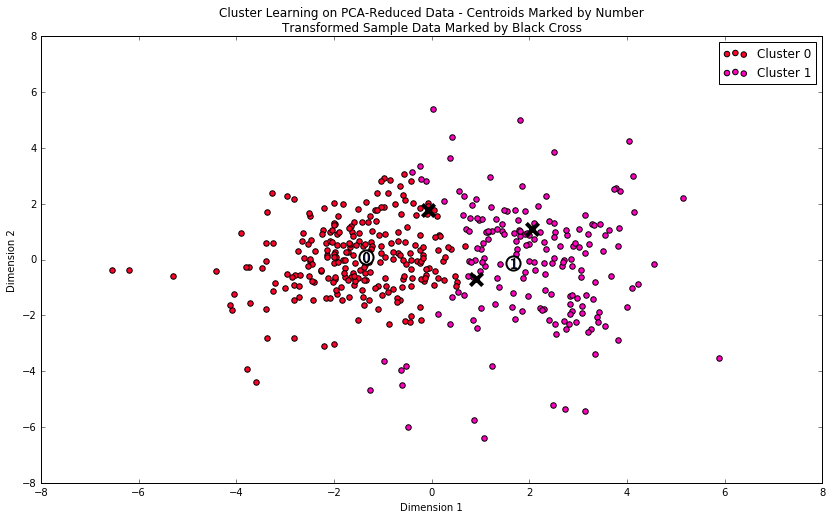

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9008.0,2071.0,2676.0,2059.0,348.0,745.0
Segment 1,4106.0,6512.0,9801.0,987.0,3174.0,916.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** A customer who is assigned to Cluster 0 has much lower than the average in terms of Fresh, higher than the average in terms of Milk, much higher than the average in terms of Grocery, lower than the average for Frozen, about the average in Detergents_Paper, and lower than the average for Deli--although Segment 0 and Segment 1 doesn't really show much differentiation in that feature. The dominant features of Segment 0 is the Milk and Grocery being above the average while Fresh being much lower than the average. The type of customer here might be grocery store. <br> <br> For segment 1 the customer who is assigned to this segment will still trend lower than the average for Fresh (which is significantly higher than in segment 0) but will trend about the average for Frozen. This customer is also significantly under the average for Detergents_Paper while trending well below the average for Milk and Grocery. If I were to guess this is a resturant. Thus, the two discriminant classes of customers will be grocery store and restaurants.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** Interestingly, for Indicy 37--which trends extremely high for Fresh the algorithm assigns it to Cluster 0 as opposed to Cluster 1. Indicy 37 does trend much much higher than the average for Grocery which is a dominant feature in this PC--as discussed above. I'm surprised though that b/c of the Fresh and Milk trends being so above the average that this point didn't get assigned to cluster 1, especially given that those are both dominant features of PC 2. My guess is that this was a point which was assigned to Cluster 0 with nothing close to 100% probability based on the EM algorithm. For Indicy 231, I believe the Grocery and Frozen features trending in line with that Cluster is the reason that it got assigned to cluster 1 and not cluster 0. Again though, given that grocery is so much lower than the average--clearly it wasn't a perfect assignment. Finally for indicy 413 it is assigned to cluster 1 which I believe to be because of Frozen and Detergents_Paper being closer to the means of those features than in cluster 0. Interestingly, Fresh Milk and Grocery are in some instances closer to Cluster 0 than Cluster 1 and in some instances not with almost equal discimination between the classes for both. <b> As an aside, I guess this excercise is meant to show how imperfect this is and that message has been received. </b>

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** We cannot assume that all customers will react equally (and postively) to this change. We can use the customer segmentation exercise and try and understand which customers likely need a daily delivery and which ones don't. For example, Milk and Grocery customers which trend higher in those categories likely want a daily delivery whereas with Fresh, Frozen, Paper and Deli a daily delivery (switched to 3 days a week) may not be a big deal and perhaps even preferred. Thus, I would try this strategy out (A/B test it) on segment 1 before I would try it on a 3 day delivery on segment 0. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** It wouldn't be terribly difficult to fit a classifier to the data based on the target variable being the segment (0 or 1) like an SVM, Decision Tree Classifier, Logsitic Regresssion etc. Given that we're trying to predict into two discriminant classes a binary classifier would be suitable (i.e. in segment 0 or not in segment 0, therefore in segment 1).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

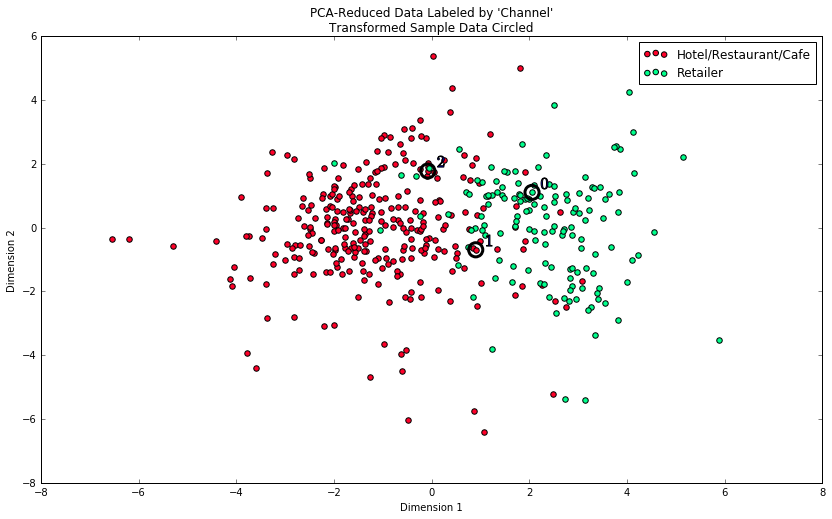

In [20]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** This is a pretty sweet vizualization! Kudos to Udacity on this. This is super interesting b/c my hunch of indicy 37 and indicy 231 being on the margins was absolutely correct while indicy 413 being much more precise was also correct. The EM algorithm does do a pretty good job disciminating between the classes and it is clear from the visualization that there are two distinct point clouds. Yes there absolutely would be customers who would classify as purely retailers or purely Ho/Re/Ca points given this clustering algorithm. Those points would be centered in the point clouds. It's pretty cool that my two points customer 37 and customer 231 are toss ups as that's not that probabilistic! I wouldn't consider this to be consistent with the previous customer segments that I hypothesized in one of my first answers. In my original thinking I thought there were going to be more classes present in the data. For example in my previous thinking, I was pretty sure there was a small v. large grocery store segment, a fast food segment and a grocery store segment. The fact that we were only able to assign segments to two classes is both surprising, dissapointing and eye-opening for the strengths and weaknesses of unsupervised clustering1

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.